In [858]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
pd.set_option('display.max_rows', None)

In [859]:
pop = pd.read_csv("world_population.csv")

In [860]:
def rename_country(country):

    country_map = {'Central African Republic':'CAR',
                 'Czech Republic (Czechia)':'Czechia',
                 'DR Congo':'DRC',
                 "Côte d'Ivoire":'Ivory Coast',
                 'South Korea':'S. Korea',
                 'State of Palestine':'Palestine',
                 'Saint Kitts & Nevis':'Saint Kitts and Nevis',
                 'Saint Pierre & Miquelon':'Saint Pierre Miquelon',
                 'Sao Tome & Principe':'Sao Tome and Principe',
                 'Saint Barthelemy':'St. Barth',
                 'St. Vincent & Grenadines':'St. Vincent Grenadines',
                 'United Arab Emirates':'UAE',
                 'United Kingdom':'UK',
                 'United States':'USA',
                 'Holy See':'Vatican City'}
    
    return country_map.get(country, country)

In [861]:
pop['Country'] = pop['Country'].map(rename_country)
pop['Population'] = pop['Population'].map(lambda x:int(re.sub(r",","",x)))
pop['Land Area'] = pop['Land Area'].map(lambda x:int(re.sub(r",","",x)))

In [862]:
pop = pop.set_index("Country")
pop.columns = ['Population Rank','Population','Land Area']

In [863]:
pop.head(15)

,Population Rank,Population,Land Area
Country,,,
China,1,1439323776,9388211
India,2,1380004385,2973190
USA,3,331002651,9147420
Indonesia,4,273523615,1811570
Pakistan,5,220892340,770880
Brazil,6,212559417,8358140
Nigeria,7,206139589,910770
Bangladesh,8,164689383,130170
Russia,9,145934462,16376870


In [864]:
pop.sort_values("Land Area", ascending=False)

,Population Rank,Population,Land Area
Country,,,
Russia,9,145934462,16376870
China,1,1439323776,9388211
USA,3,331002651,9147420
Canada,39,37742154,9093510
Brazil,6,212559417,8358140
Australia,55,25499884,7682300
India,2,1380004385,2973190
Argentina,32,45195774,2736690
Kazakhstan,64,18776707,2699700


In [869]:
df = pd.read_csv("covid_data.csv")

In [870]:
df.Country.nunique()

215

In [871]:
df.Date.nunique()

74

In [872]:
df.head()

,Active Cases,Country,Date,New Cases,New Deaths,Serious Critical,Tot Cases per 1M pop,Tot Deaths per 1M pop,Total Cases,Total Deaths,Total Recovered
0,NaN,Afghanistan,2020-02-15,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
1,NaN,Afghanistan,2020-02-16,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
2,NaN,Afghanistan,2020-02-17,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
3,NaN,Afghanistan,2020-02-18,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
4,NaN,Afghanistan,2020-02-19,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN


In [873]:
df = df[['Date', 'Country', 'Total Cases', 'Total Deaths', 'Tot Deaths per 1M pop']]
df.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Death Rate']

In [874]:
key_countries = ['China', 'Italy', 'Spain', 'France', 'UK', 'USA','Peru','Russia','India','Chile','Pakistan']

In [876]:
cases = df.pivot(index='Country', columns='Date', values='Cases')
deaths = df.pivot(index='Country', columns='Date', values='Deaths')

In [877]:
cases = cases.fillna(0)
cases = cases.astype(int)
deaths = deaths.fillna(0)
deaths = deaths.astype(int)

In [878]:
cases.loc[key_countries]

Date,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,
China,68500,70548,72436,74185,74576,75465,76288,76936,77150,77658,...,82747,82758,82788,82798,82804,82816,82827,82830,82836,82858
Italy,3,3,3,3,3,4,21,79,157,229,...,178972,181228,183957,187327,189973,192994,195351,197675,199414,201505
Spain,2,2,2,2,2,2,2,2,2,3,...,198674,200210,204178,208389,213024,219764,223759,226629,229422,232128
France,12,12,12,12,12,12,12,12,12,12,...,152894,155383,158050,159877,158183,159828,161488,162100,165842,165911
UK,9,9,9,9,9,9,9,9,13,13,...,120067,124743,129044,133495,138078,143464,148377,152840,157149,161145
USA,15,15,15,15,15,15,35,35,35,53,...,764265,792913,819175,849092,886709,925232,960896,987322,1010507,1035765
Peru,0,0,0,0,0,0,0,0,0,0,...,15628,16325,17837,19250,20914,21648,25331,27517,28699,31190
Russia,2,2,2,2,2,2,2,2,2,2,...,42853,47121,52763,57999,62773,68622,74588,80949,87147,93558
India,3,3,3,3,3,3,3,3,3,3,...,17615,18601,20111,21450,23502,24530,26496,27964,29451,31324


In [879]:
cases.loc['USA']

Date
2020-02-15         15
2020-02-16         15
2020-02-17         15
2020-02-18         15
2020-02-19         15
2020-02-20         15
2020-02-21         35
2020-02-22         35
2020-02-23         35
2020-02-24         53
2020-02-25         57
2020-02-26         60
2020-02-27         60
2020-02-28         63
2020-02-29         68
2020-03-01         75
2020-03-02        100
2020-03-03        124
2020-03-04        158
2020-03-05        221
2020-03-06        319
2020-03-07        435
2020-03-08        541
2020-03-09        704
2020-03-10        994
2020-03-11       1301
2020-03-12       1630
2020-03-13       2183
2020-03-14       2770
2020-03-15       3613
2020-03-16       4596
2020-03-17       6346
2020-03-18       9296
2020-03-19      13865
2020-03-20      19497
2020-03-21      24345
2020-03-22      33745
2020-03-23      44056
2020-03-24      54867
2020-03-25      68472
2020-03-26      85594
2020-03-27     104205
2020-03-28     123750
2020-03-29     142178
2020-03-30     164253
2020-

In [880]:
deaths.loc[key_countries]

Date,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,
China,1665,1770,1868,2004,2118,2236,2345,2442,2592,2663,...,4632,4632,4632,4632,4632,4632,4632,4633,4633,4633
Italy,0,0,0,0,0,0,1,2,3,7,...,23660,24114,24648,25085,25549,25969,26384,26644,26977,27359
Spain,0,0,0,0,0,0,0,0,0,0,...,20453,20852,21282,21717,22157,22524,22902,23190,23521,23822
France,1,1,1,1,1,1,1,1,1,1,...,19718,20265,20796,21340,21856,22245,22614,22856,23293,23660
UK,0,0,0,0,0,0,0,0,0,0,...,16060,16509,17337,18100,18738,19506,20319,20732,21092,21678
USA,0,0,0,0,0,0,0,0,0,0,...,40565,42517,45343,47681,50243,52193,54265,55415,56803,59266
Peru,0,0,0,0,0,0,0,0,0,0,...,400,445,484,530,572,634,700,728,782,854
Russia,0,0,0,0,0,0,0,0,0,0,...,361,405,456,513,555,615,681,747,794,867
India,0,0,0,0,0,0,0,0,0,0,...,559,592,645,681,722,780,825,884,939,1008


In [813]:
deaths.loc['UK']

Date
2020-02-15        0
2020-02-16        0
2020-02-17        0
2020-02-18        0
2020-02-19        0
2020-02-20        0
2020-02-21        0
2020-02-22        0
2020-02-23        0
2020-02-24        0
2020-02-25        0
2020-02-26        0
2020-02-27        0
2020-02-28        0
2020-02-29        0
2020-03-01        0
2020-03-02        0
2020-03-03        0
2020-03-04        0
2020-03-05        1
2020-03-06        2
2020-03-07        2
2020-03-08        3
2020-03-09        5
2020-03-10        6
2020-03-11        8
2020-03-12       10
2020-03-13       11
2020-03-14       21
2020-03-15       35
2020-03-16       55
2020-03-17       71
2020-03-18      104
2020-03-19      144
2020-03-20      177
2020-03-21      233
2020-03-22      281
2020-03-23      335
2020-03-24      422
2020-03-25      465
2020-03-26      578
2020-03-27      759
2020-03-28     1019
2020-03-29     1228
2020-03-30     1408
2020-03-31     1789
2020-04-01     2352
2020-04-02     2921
2020-04-03     3605
2020-04-04     

In [881]:
def get_new(df):
    
    dates = df.columns.to_list()
    new_df = pd.DataFrame((df[dates[1]] - df[dates[0]]))
    new_df.columns = [dates[1]]
    
    for i in range(len(dates)-2):
        new_df[dates[i+2]] = df[dates[i+2]] - df[dates[i+1]]
        
    return new_df

In [882]:
new_cases = get_new(cases)
new_cases.loc[key_countries]

,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,
China,2048,1888,1749,391,889,823,648,214,508,406,...,12,11,30,10,6,12,11,3,6,22
Italy,0,0,0,0,1,17,58,78,72,94,...,3047,2256,2729,3370,2646,3021,2357,2324,1739,2091
Spain,0,0,0,0,0,0,0,0,1,6,...,4258,1536,3968,4211,4635,6740,3995,2870,2793,2706
France,0,0,0,0,0,0,0,0,0,2,...,1101,2489,2667,1827,-1694,1645,1660,612,3742,69
UK,0,0,0,0,0,0,0,4,0,0,...,5850,4676,4301,4451,4583,5386,4913,4463,4309,3996
USA,0,0,0,0,0,20,0,0,18,4,...,25352,28648,26262,29917,37617,38523,35664,26426,23185,25258
Peru,0,0,0,0,0,0,0,0,0,0,...,1208,697,1512,1413,1664,734,3683,2186,1182,2491
Russia,0,0,0,0,0,0,0,0,0,0,...,6060,4268,5642,5236,4774,5849,5966,6361,6198,6411
India,0,0,0,0,0,0,0,0,0,0,...,1250,986,1510,1339,2052,1028,1966,1468,1487,1873


In [883]:
new_deaths = get_new(deaths)
new_deaths.loc[key_countries]

,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,
China,105,98,136,114,118,109,97,150,71,52,...,0,0,0,0,0,0,0,1,0,0
Italy,0,0,0,0,0,1,1,1,4,4,...,433,454,534,437,464,420,415,260,333,382
Spain,0,0,0,0,0,0,0,0,0,0,...,-186,399,430,435,440,367,378,288,331,301
France,0,0,0,0,0,0,0,0,0,0,...,395,547,531,544,516,389,369,242,437,367
UK,0,0,0,0,0,0,0,0,0,0,...,596,449,828,763,638,768,813,413,360,586
USA,0,0,0,0,0,0,0,0,0,0,...,1550,1952,2826,2338,2562,1950,2072,1150,1388,2463
Peru,0,0,0,0,0,0,0,0,0,0,...,52,45,39,46,42,62,66,28,54,72
Russia,0,0,0,0,0,0,0,0,0,0,...,48,44,51,57,42,60,66,66,47,73
India,0,0,0,0,0,0,0,0,0,0,...,38,33,53,36,41,58,45,59,55,69


In [884]:
def get_new_as_pct_total(df, new_df):
    
    dates = df.columns.to_list()

    inc_df = pd.DataFrame((new_df[dates[1]] / df[dates[0]]))
    inc_df.columns = [dates[1]]    
    
    for i in range(len(dates)-2):
        inc_df[dates[i+2]] = new_df[dates[i+2]] / df[dates[i+1]]    
    
    return inc_df

In [885]:
new_cases_inc = get_new_as_pct_total(cases, new_cases)
100*round(new_cases_inc.loc[key_countries],3)

,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,
China,3.0,2.7,2.4,0.5,1.2,1.1,0.8,0.3,0.7,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Italy,0.0,0.0,0.0,0.0,33.3,425.0,276.2,98.7,45.9,41.0,...,1.7,1.3,1.5,1.8,1.4,1.6,1.2,1.2,0.9,1.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,200.0,...,2.2,0.8,2.0,2.1,2.2,3.2,1.8,1.3,1.2,1.2
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7,...,0.7,1.6,1.7,1.2,-1.1,1.0,1.0,0.4,2.3,0.0
UK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.4,0.0,0.0,...,5.1,3.9,3.4,3.4,3.4,3.9,3.4,3.0,2.8,2.5
USA,0.0,0.0,0.0,0.0,0.0,133.3,0.0,0.0,51.4,7.5,...,3.4,3.7,3.3,3.7,4.4,4.3,3.9,2.8,2.3,2.5
Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.4,4.5,9.3,7.9,8.6,3.5,17.0,8.6,4.3,8.7
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.5,10.0,12.0,9.9,8.2,9.3,8.7,8.5,7.7,7.4
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.6,5.6,8.1,6.7,9.6,4.4,8.0,5.5,5.3,6.4


In [886]:
new_death_inc = get_new_as_pct_total(deaths, new_deaths)
100*round(new_death_inc.loc[key_countries],3)

,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Country,,,,,,,,,,,,,,,,,,,,,
China,6.3,5.5,7.3,5.7,5.6,4.9,4.1,6.1,2.7,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Italy,NaN,NaN,NaN,NaN,NaN,inf,100.0,50.0,133.3,57.1,...,1.9,1.9,2.2,1.8,1.8,1.6,1.6,1.0,1.2,1.4
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.9,2.0,2.1,2.0,2.0,1.7,1.7,1.3,1.4,1.3
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.8,2.6,2.6,2.4,1.8,1.7,1.1,1.9,1.6
UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,2.8,5.0,4.4,3.5,4.1,4.2,2.0,1.7,2.8
USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.8,6.6,5.2,5.4,3.9,4.0,2.1,2.5,4.3
Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.9,11.2,8.8,9.5,7.9,10.8,10.4,4.0,7.4,9.2
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.3,12.2,12.6,12.5,8.2,10.8,10.7,9.7,6.3,9.2
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3,5.9,9.0,5.6,6.0,8.0,5.8,7.2,6.2,7.3


In [887]:
cases_ranks = pd.DataFrame([i+1 for i in range(100)])
deaths_ranks = pd.DataFrame([i+1 for i in range(100)])
cases_ranks.columns = ['Rank']
deaths_ranks.columns = ['Rank']

for date in cases.columns:
    
    top100_cases = cases[date][cases[date]>0].sort_values(ascending=False).iloc[:100].index.to_list()
    if len(top100_cases) < 100:
        top100_cases = top100_cases + [None]*(100-len(top100_cases))
    cases_ranks[date] = top100_cases
    
    top100_deaths = deaths[date][deaths[date]>0].sort_values(ascending=False).iloc[:100].index.to_list()
    if len(top100_deaths) < 100:
        top100_deaths = top100_deaths + [None]*(100-len(top100_deaths))    
    deaths_ranks[date] = top100_deaths
    
cases_ranks = cases_ranks.set_index("Rank")
deaths_ranks = deaths_ranks.set_index("Rank")

In [888]:
cases_ranks = cases_ranks.fillna("N/A")
cases_ranks

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Rank,,,,,,,,,,,,,,,,,,,,,
1,China,China,China,China,China,China,China,China,China,China,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
2,Singapore,Singapore,Singapore,Singapore,Japan,S. Korea,S. Korea,S. Korea,S. Korea,S. Korea,...,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
3,Hong Kong,Japan,Japan,Japan,Singapore,Japan,Japan,Japan,Italy,Italy,...,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy
4,Japan,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Singapore,Singapore,Singapore,Japan,Japan,...,France,France,France,France,France,France,France,France,France,France
5,Thailand,Thailand,Thailand,Thailand,S. Korea,Hong Kong,Hong Kong,Italy,Singapore,Singapore,...,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,UK
6,S. Korea,S. Korea,S. Korea,S. Korea,Thailand,Thailand,Thailand,Hong Kong,Hong Kong,Hong Kong,...,UK,UK,UK,UK,UK,UK,UK,UK,UK,Germany
7,Malaysia,Malaysia,Malaysia,Malaysia,Taiwan,Taiwan,USA,Thailand,Iran,Iran,...,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey
8,Taiwan,Taiwan,Taiwan,Taiwan,Malaysia,Malaysia,Taiwan,USA,Thailand,USA,...,China,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Iran,Russia
9,Germany,Germany,Germany,Germany,Vietnam,Australia,Malaysia,Iran,USA,Thailand,...,Iran,China,China,China,China,China,China,China,Russia,Iran


In [889]:
deaths_ranks = deaths_ranks.fillna("N/A")
deaths_ranks

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
Rank,,,,,,,,,,,,,,,,,,,,,
1,China,China,China,China,China,China,China,China,China,China,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
2,Philippines,Taiwan,Taiwan,Taiwan,Iran,Iran,Iran,Iran,Iran,Iran,...,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy
3,Japan,Philippines,Philippines,Philippines,Hong Kong,Hong Kong,S. Korea,S. Korea,S. Korea,S. Korea,...,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
4,Hong Kong,Japan,Japan,Japan,Taiwan,Taiwan,Hong Kong,Italy,Italy,Italy,...,France,France,France,France,France,France,France,France,France,France
5,France,Hong Kong,Hong Kong,Hong Kong,Philippines,S. Korea,Taiwan,Hong Kong,Hong Kong,Hong Kong,...,UK,UK,UK,UK,UK,UK,UK,UK,UK,UK
6,N/A,France,France,France,Japan,Philippines,Philippines,Taiwan,Taiwan,Taiwan,...,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium
7,N/A,N/A,N/A,N/A,France,Japan,Japan,Philippines,Philippines,Philippines,...,Iran,Iran,Iran,Iran,Germany,Germany,Germany,Germany,Germany,Germany
8,N/A,N/A,N/A,N/A,N/A,France,Italy,Japan,Japan,Japan,...,Germany,Germany,Germany,Germany,Iran,Iran,Iran,Iran,Iran,Iran
9,N/A,N/A,N/A,N/A,N/A,N/A,France,France,France,France,...,China,China,China,China,China,China,China,China,China,Brazil


In [890]:
cases_ranks.to_csv("cases_ranks.csv")
deaths_ranks.to_csv("deaths_ranks.csv")

In [891]:
dates = cases_ranks.columns

In [892]:
def get_cases_daily_rank(row, date):
    country = row.Country
    top50 = {v:k for k,v in cases_ranks[date].to_dict().items()}
    return top50.get(country)

In [893]:
def get_deaths_daily_rank(row, date):
    country = row.Country
    top50 = {v:k for k,v in deaths_ranks[date].to_dict().items()}
    return top50.get(country)

In [894]:
dates

Index(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
       '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
       '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',

In [895]:
cases_countries = pd.DataFrame(cases.index)
for date in dates:
    cases_countries[date] = cases_countries.apply(get_cases_daily_rank, date=date, axis=1)
cases_countries = cases_countries.set_index('Country')

In [896]:
cases_countries = pd.merge(cases_countries, pop['Population Rank'], left_index=True, right_index=True)
cases_countries[[c for c in cases_countries.columns if c < '2020-02-27']] = cases_countries[[c for c in cases_countries.columns if c < '2020-02-27']].fillna("N/A")
cases_countries = cases_countries.fillna("-")

In [897]:
cases_countries.loc[key_countries].sort_values('Population Rank')

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,Population Rank
Country,,,,,,,,,,,,,,,,,,,,,
China,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,10,10,1
India,20,20,20,20,19,20,21,21,21,21,...,17,17,17,16,16,16,16,15,15,2
USA,12,12,12,12,11,12,7,8,9,8,...,1,1,1,1,1,1,1,1,1,3
Pakistan,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,29,29,29,29,29,28,29,27,27,5
Russia,22,22,22,22,23,22,22,22,22,26,...,10,10,10,10,10,10,10,9,8,9
UK,15,16,16,16,15,16,19,19,15,16,...,6,6,6,6,6,6,6,6,5,21
France,13,13,13,13,13,13,15,16,17,17,...,4,4,4,4,4,4,4,4,4,22
Italy,19,19,19,19,18,19,10,5,3,3,...,3,3,3,3,3,3,3,3,3,23
Spain,21,21,21,21,22,23,23,23,23,23,...,2,2,2,2,2,2,2,2,2,30


In [898]:
deaths_countries = pd.DataFrame(deaths.index)
for date in dates:
    deaths_countries[date] = deaths_countries.apply(get_deaths_daily_rank, date=date, axis=1)
deaths_countries = deaths_countries.set_index('Country')

In [899]:
deaths_countries = pd.merge(deaths_countries, pop['Population Rank'], left_index=True, right_index=True)
deaths_countries[[c for c in deaths_countries.columns if c < '2020-03-16']] = deaths_countries[[c for c in deaths_countries.columns if c < '2020-03-16']].fillna("N/A")
deaths_countries = deaths_countries.fillna("-")

In [900]:
deaths_countries.loc[key_countries].sort_values('Population Rank')

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,Population Rank
Country,,,,,,,,,,,,,,,,,,,,,
China,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,10,1
India,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,19,19,19,19,19,19,19,18,18,2
USA,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,1,1,1,1,1,1,1,1,1,3
Pakistan,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,36,35,35,35,33,33,32,32,32,5
Russia,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,26,25,24,23,22,22,20,20,21,9
UK,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,5,5,5,5,5,5,5,5,5,21
France,5,6,6,6,7,8,9,9,9,9,...,4,4,4,4,4,4,4,4,4,22
Italy,N/A,N/A,N/A,N/A,N/A,N/A,8,4,4,4,...,2,2,2,2,2,2,2,2,2,23
Spain,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,3,3,3,3,3,3,3,3,3,30


In [902]:
deaths_countries.loc[key_countries]

,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,Population Rank
Country,,,,,,,,,,,,,,,,,,,,,
China,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,10,1
Italy,N/A,N/A,N/A,N/A,N/A,N/A,8,4,4,4,...,2,2,2,2,2,2,2,2,2,23
Spain,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,3,3,3,3,3,3,3,3,3,30
France,5,6,6,6,7,8,9,9,9,9,...,4,4,4,4,4,4,4,4,4,22
UK,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,5,5,5,5,5,5,5,5,5,21
USA,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,1,1,1,1,1,1,1,1,1,3
Peru,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,24,24,22,21,21,21,22,21,22,43
Russia,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,26,25,24,23,22,22,20,20,21,9
India,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,19,19,19,19,19,19,19,18,18,2


In [903]:
cases_countries.to_csv("country_ranks_cases.csv")

In [904]:
deaths_countries.to_csv("country_ranks_deaths.csv")

In [913]:
last_date = max(cases.columns)
last_date

'2020-04-28'

In [914]:
cases_deaths_ranks = pd.merge(cases_countries[last_date], deaths_countries[last_date],
                             left_index=True, right_index=True)
cases_deaths_ranks.columns = ['Cases Rank', 'Deaths Rank']

In [918]:
cases_deaths_ranks = cases_deaths_ranks[(cases_deaths_ranks['Cases Rank'] != '-')&(cases_deaths_ranks['Deaths Rank'] != '-')]

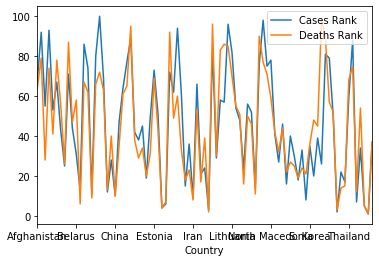

In [919]:
cases_deaths_ranks.plot()

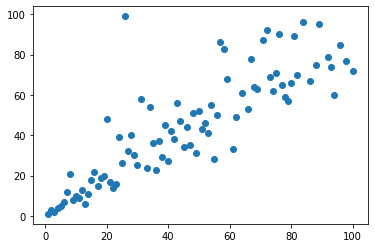

In [920]:
plt.scatter(cases_deaths_ranks['Cases Rank'], cases_deaths_ranks['Deaths Rank'])

In [921]:
cases_deaths_ranks.to_csv("ranks.csv")

In [922]:
round(100*cases.loc['USA']/cases.sum(),2)

Date
2020-02-15     0.02
2020-02-16     0.02
2020-02-17     0.02
2020-02-18     0.02
2020-02-19     0.02
2020-02-20     0.02
2020-02-21     0.05
2020-02-22     0.04
2020-02-23     0.04
2020-02-24     0.07
2020-02-25     0.07
2020-02-26     0.07
2020-02-27     0.07
2020-02-28     0.08
2020-02-29     0.08
2020-03-01     0.09
2020-03-02     0.11
2020-03-03     0.13
2020-03-04     0.17
2020-03-05     0.23
2020-03-06     0.31
2020-03-07     0.41
2020-03-08     0.49
2020-03-09     0.62
2020-03-10     0.84
2020-03-11     1.04
2020-03-12     1.22
2020-03-13     1.51
2020-03-14     1.78
2020-03-15     2.14
2020-03-16     2.53
2020-03-17     3.21
2020-03-18     4.26
2020-03-19     5.68
2020-03-20     7.09
2020-03-21     8.00
2020-03-22    10.02
2020-03-23    11.64
2020-03-24    12.97
2020-03-25    14.52
2020-03-26    16.08
2020-03-27    17.45
2020-03-28    18.64
2020-03-29    19.68
2020-03-30    20.90
2020-03-31    21.94
2020-04-01    23.00
2020-04-02    24.14
2020-04-03    25.23
2020-04-04    2

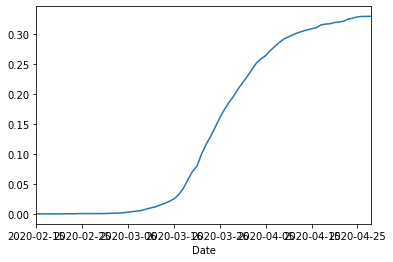

In [923]:
(cases.loc['USA']/cases.sum()).plot()

In [924]:
round(100*deaths.loc['USA']/deaths.sum(),2)

Date
2020-02-15     0.00
2020-02-16     0.00
2020-02-17     0.00
2020-02-18     0.00
2020-02-19     0.00
2020-02-20     0.00
2020-02-21     0.00
2020-02-22     0.00
2020-02-23     0.00
2020-02-24     0.00
2020-02-25     0.00
2020-02-26     0.00
2020-02-27     0.00
2020-02-28     0.00
2020-02-29     0.03
2020-03-01     0.03
2020-03-02     0.19
2020-03-03     0.28
2020-03-04     0.34
2020-03-05     0.35
2020-03-06     0.43
2020-03-07     0.53
2020-03-08     0.58
2020-03-09     0.65
2020-03-10     0.70
2020-03-11     0.82
2020-03-12     0.82
2020-03-13     0.89
2020-03-14     0.98
2020-03-15     1.06
2020-03-16     1.22
2020-03-17     1.38
2020-03-18     1.68
2020-03-19     2.06
2020-03-20     2.24
2020-03-21     2.31
2020-03-22     2.83
2020-03-23     3.37
2020-03-24     4.14
2020-03-25     4.85
2020-03-26     5.40
2020-03-27     6.22
2020-03-28     7.21
2020-03-29     7.31
2020-03-30     8.37
2020-03-31     9.58
2020-04-01    10.82
2020-04-02    11.44
2020-04-03    12.50
2020-04-04    1

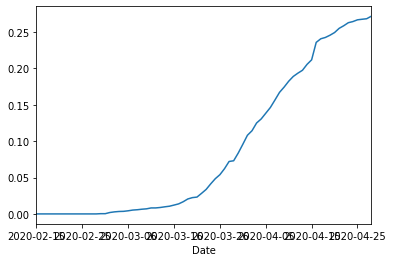

In [925]:
(deaths.loc['USA']/deaths.sum()).plot()